<a href="https://colab.research.google.com/github/suhasAB/TF2/blob/master/intro/TF2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-05-15 11:21:19--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-05-15 11:21:19 (34.7 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [3]:
data=pd.read_csv('moore.csv',header=None).values

In [4]:
type(data)

numpy.ndarray

In [5]:
X=data[:,0].reshape(-1,1)

In [6]:
Y=data[:,1]

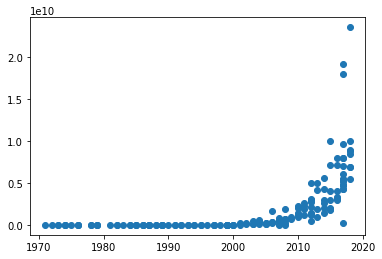

In [7]:
plt.scatter(X,Y)

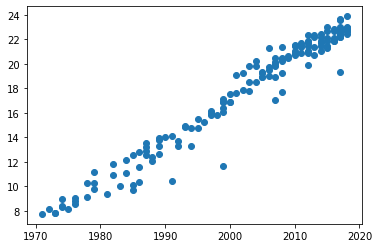

In [8]:
import numpy as np

Y=np.log(Y)
plt.scatter(X,Y);

In [9]:
X=X-X.mean()

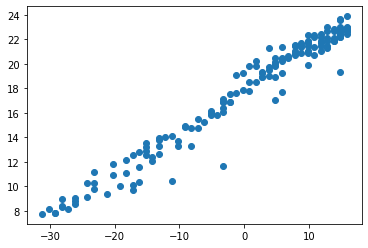

In [11]:
plt.scatter(X,Y);

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9) ,loss='mse')

In [15]:
#learning rate scheduler
def schedule(epoch,lr):
  if(epoch>=50):
    return 0.0001
  return 0.001

scheduler= tf.keras.callbacks.LearningRateScheduler(schedule)

In [16]:
r=model.fit(X,Y,epochs=200,callbacks=scheduler)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 755.1826
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 1052.5320
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 811.9914
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 452.9727
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 354.0914
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 154.6395
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 181.4523
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 82.8791
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 61.7281
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 74.6149
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 65.8995
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 23.8946
Epoch 13/200
6/6 [=======================

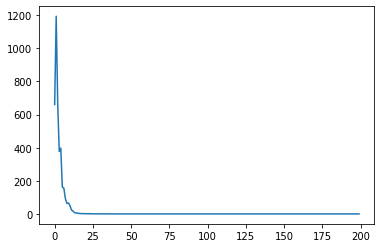

In [17]:
plt.plot(r.history['loss'],label='loss')

In [18]:
print(model.layers)

In [20]:
print(model.layers[0].get_weights())

[array([[0.33112195]], dtype=float32), array([17.765106], dtype=float32)]


In [23]:
print("Weight(from 2D array:)",model.layers[0].get_weights()[0][0,0])

Weight(from 2D array:) 0.33112195


In [40]:
print("Bias from 1D array:", model.layers[0].get_weights()[1])

Bias from 1D array: [17.765106]


In [42]:
#slope of line is:
a=model.layers[0].get_weights()[0][0,0]

In [43]:
print("time to double:",np.log(2)/a)

time to double: 2.0933289917852753


Hence Moore's law is prooved